# Planet 

## 1. Initial exploration

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.sgdr import *
from fastai.dataset import *
from fastai.conv_learner import *
from fastai.transforms import *
from fastai.plots import *

In [3]:
PATH = '../data/Planet/'
os.listdir(PATH)

['sample_submission_v2.csv',
 'sample_submission_v2.csv.zip',
 'test-jpg',
 'test-jpg.tar.7z',
 'test_v2_file_mapping.csv',
 'test_v2_file_mapping.csv.zip',
 'train-jpg',
 'train-jpg.tar.7z',
 'train_v2.csv',
 'train_v2.csv.zip']

In [46]:
labelName = f'{PATH}train_v2.csv'

In [47]:
labels = pd.read_csv(labelName)
labels.head(),labels.shape

(  image_name                                       tags
 0    train_0                               haze primary
 1    train_1            agriculture clear primary water
 2    train_2                              clear primary
 3    train_3                              clear primary
 4    train_4  agriculture clear habitation primary road, (40479, 2))

In [19]:
imgs = os.listdir(f'{PATH}train-jpg')[:5];imgs

['train_0.jpg',
 'train_1.jpg',
 'train_10.jpg',
 'train_100.jpg',
 'train_1000.jpg']

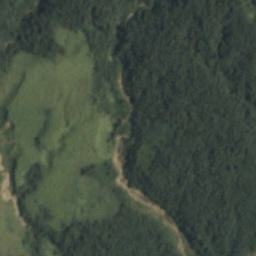

In [26]:
img = PIL.Image.open(f'{PATH}train-jpg/{imgs[1]}').convert('RGB');img

## 2. Initial architecture and data

In [31]:
val_idxs = get_cv_idxs(labels.shape[0]);val_idxs[:5]

array([34602, 11243, 14499, 18918, 30631])

In [49]:
arch = resnet34
sz = 64
bs = 64

def get_data(sz,bs):
    tfms = tfms_from_model(arch,sz,aug_tfms=transforms_top_down,max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train-jpg',labelName,bs=bs, tfms = tfms, val_idxs = val_idxs,
                                       suffix='.jpg',test_name = 'test-jpg')
    return data

data = get_data(sz,bs)


## 3. Training model